# Exploratory Data Analysis

### Initial Plan for Data Exploration
1. Import Libraries
2. Load Dataset
3. Descriptive Analysis
4. Categorical Analysis
5. Plot Histograms
6. Feature Engineering
7. Data Wrangling
8. Save a Pickle
9. Further Pattern Analysis

### Features:
- **accountNumber**: Unique identifier for the account.
- **customerId**: Unique identifier for the customer.
- **creditLimit**: Maximum credit limit allowed for the account.
- **availableMoney**: Amount of money currently available for transactions.
- **transactionDateTime**: Date and time of the transaction.
- **transactionAmount**: Amount of money involved in the transaction.
- **merchantName**: Name of the merchant where the transaction occurred. (e.g., Uber, Lyft, alibaba.com and etc.)
- **acqCountry**: Country where the transaction was acquired. (e.g., U.S., Mexico, Canada, and Puero Rico)
- **merchantCountryCode**: Country code of the merchant. (e.g., U.S., Mexico, Canada, and Puero Rico)
- **posEntryMode**: Mode of entry for the point-of-sale transaction. (e.g., 00-missing, 02-magnetic stripe, 05-chip, 09-manual entry, 80-contactless, 90-magnetic stripe fallback)
- **posConditionCode**: Condition of the point-of-sale transaction. (e.g., 00-missing, 01-normal, 08-mail/telephone order, 99-unknown)
- **merchantCategoryCode**: Category of the merchant. (e.g., online_retail, fastfood, entertainment and etc.)
- **currentExpDate**: Current expiration date of the credit card.
- **accountOpenDate**: Date when the account was opened.
- **dateOfLastAddressChange**: Date of the last address change for the account.
- **cardCVV**: Card verification value associated with the credit card.
- **enteredCVV**: CVV entered during the transaction.
- **cardLast4Digits**: Last four digits of the credit card number.
- **transactionType**: Type of transaction (e.g., PURCHASE, REVERSAL and ADDRESS_VERIFICATION).
- **echoBuffer**: Placeholder field for temporary data storage.
- **currentBalance**: Current balance on the account.
- **merchantCity**: City where the merchant is located.
- **merchantState**: State where the merchant is located.
- **merchantZip**: ZIP code of the merchant's location.
- **cardPresent**: Indicates whether the card was present during the transaction. (e.g., False, and True)
- **posOnPremises**: Indicates if the transaction occurred on the merchant’s premises.
- **recurringAuthInd**: Indicates if the transaction is part of a recurring authorization.
- **expirationDateKeyInMatch**: Indicates if the keyed-in expiration date matches the card's expiration date.
- **isFraud**: Indicates whether the transaction is fraudulent. (e.g., False, and True)

## 1. Import Libraries

In [165]:
# Load general utilities
# ----------------------
import numpy as np 
import pandas as pd
import json
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
from datetime import date
import os
import requests
import zipfile
import io,time,joblib

# Load scikit-learn utilities
# ----------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve, auc,ConfusionMatrixDisplay,classification_report,recall_score,f1_score

# Classifiers, Cross-Validation, and over-sampling
# --------------
from xgboost import XGBClassifier # XGBoost Classifier ouperformces 
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import optuna # For hyperparameter tuning, Optuna surpasses GridSearchCV by using Bayesian optimization to efficiently explore and find the best parameters.
from imblearn.over_sampling import RandomOverSampler

# Internal utility functions and 
# --------------
import a0_utility_functions as func # Visulization 
import shap

plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [166]:
# configrations
# URL of the zip file from GitHub
url = 'https://github.com/CapitalOneRecruiting/DS/raw/master/transactions.zip'
input_data_folder = 'transactions_data'
filename = 'transactions.txt'

In [167]:
dir_data= "./transactions_data"

## 2. Load Dataset

In [168]:
# Download the zip file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the zip file
    zip_file = zipfile.ZipFile(io.BytesIO(response.content))
    zip_file.extractall(input_data_folder)  # Extract to a directory named 'transactions_data'
    zip_file.close()
    print("Zip file extracted successfully.")
else:
    print(f"Failed to download zip file. Status code: {response.status_code}")

Zip file extracted successfully.


In [169]:
# Use ingest_files internal function to upload CSV and JSON multiple files
files_data = func.ingest_files(dir_data)

Directory ./transactions_data/ has 1 files:
    Reading file transactions.txt


KeyboardInterrupt: 

In [ ]:
df = pd.concat(files_data.values()).reset_index(drop=True)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,PURCHASE,,0.0,,,,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,PURCHASE,,0.0,,,,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,PURCHASE,,0.0,,,,,,False,False
3,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,PURCHASE,,0.0,,,,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,02,...,PURCHASE,,0.0,,,,,,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786362 entries, 0 to 786361
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786362 non-null  object 
 1   customerId                786362 non-null  object 
 2   creditLimit               786362 non-null  float64
 3   availableMoney            786362 non-null  float64
 4   transactionDateTime       786362 non-null  object 
 5   transactionAmount         786362 non-null  float64
 6   merchantName              786362 non-null  object 
 7   acqCountry                786362 non-null  object 
 8   merchantCountryCode       786362 non-null  object 
 9   posEntryMode              786362 non-null  object 
 10  posConditionCode          786362 non-null  object 
 11  merchantCategoryCode      786362 non-null  object 
 12  cardPresent               786362 non-null  bool   
 13  currentExpDate            786362 non-null  o

### Data Structure

In [ ]:
print(f"Data consist of {df.shape[0]:,.0f} observation with {df.shape[1]} columns")

Data consist of 786,362 observation with 29 columns


In [ ]:
# Print the unique values for columns less than 20 unique values
for i in df.columns:
    if df[i].nunique() < 20:
        print(i, df[i].unique())
        print('-'*20)

creditLimit [ 5000.  2500. 50000. 15000. 10000.   250.   500.  1000.  7500. 20000.]
--------------------
acqCountry ['US' '' 'CAN' 'MEX' 'PR']
--------------------
merchantCountryCode ['US' 'CAN' '' 'PR' 'MEX']
--------------------
posEntryMode ['09' '02' '05' '80' '90' '']
--------------------
posConditionCode ['01' '08' '99' '']
--------------------
merchantCategoryCode ['entertainment' 'mobileapps' 'fastfood' 'food_delivery' 'auto'
 'online_retail' 'gym' 'health' 'personal care' 'food' 'rideshare' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']
--------------------
cardPresent [ True False]
--------------------
transactionType ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' '']
--------------------
echoBuffer ['']
--------------------
merchantCity ['']
--------------------
merchantState ['']
--------------------
merchantZip ['']
--------------------
posOnPremises ['']
--------------------
recurringAuthInd ['']
--------------

In [ ]:
# Replace blank with nan
df.replace('', np.nan, inplace=True)
df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
cardPresent                      0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786362
currentBalance                   0
merchantCity                786362
merchantState               786362
merchantZip                 786362
posOnPremises               786362
recurringAuthInd            786362
expirationDateKeyInMatch         0
isFraud             

In [ ]:
for i in df.columns:
    if df[i].nunique() < 20:
        print(i,df[i].unique())
        print('-'*20)

creditLimit [ 5000.  2500. 50000. 15000. 10000.   250.   500.  1000.  7500. 20000.]
--------------------
acqCountry ['US' nan 'CAN' 'MEX' 'PR']
--------------------
merchantCountryCode ['US' 'CAN' nan 'PR' 'MEX']
--------------------
posEntryMode ['09' '02' '05' '80' '90' nan]
--------------------
posConditionCode ['01' '08' '99' nan]
--------------------
merchantCategoryCode ['entertainment' 'mobileapps' 'fastfood' 'food_delivery' 'auto'
 'online_retail' 'gym' 'health' 'personal care' 'food' 'rideshare' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']
--------------------
cardPresent [ True False]
--------------------
transactionType ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' nan]
--------------------
echoBuffer [nan]
--------------------
merchantCity [nan]
--------------------
merchantState [nan]
--------------------
merchantZip [nan]
--------------------
posOnPremises [nan]
--------------------
recurringAuthInd [nan]
---

### Missing Value Treatment

In [ ]:
# Handle missing values by considering them as "UNKNOW" or "00".
df.acqCountry = df.acqCountry.fillna("UNKNOWN")
df.merchantCountryCode = df.merchantCountryCode.fillna("UNKNOWN")
df.posEntryMode = df.posEntryMode.fillna("00")
df.posConditionCode = df.posConditionCode.fillna("00")
df.transactionType = df.transactionType.fillna("UNKNOWN")

In [ ]:
# Ensure that there are no unmatched customerIds when compared to accountNumbers.
df['ID_Match'] = df['accountNumber'] == df['customerId']
df['ID_Match'] = df['ID_Match'].astype(int)
rows_mismatch = df[df['ID_Match'] != 1]

print(f"Rows where accountNumber and customerId are not matched: {len(rows_mismatch)}")

Rows where accountNumber and customerId are not matched: 0


In [ ]:
# Dropping all features where data is missing 100%
df = df.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],axis=1)

# Dropping duplicate features
df = df.drop(['customerId', 'ID_Match'],axis=1)

In [ ]:
# identify missing records
df.isnull().sum()

accountNumber               0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
cardPresent                 0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [ ]:
for i in df.columns:
    if df[i].nunique() < 20:
        print(i,df[i].unique())
        print('-'*20)

creditLimit [ 5000.  2500. 50000. 15000. 10000.   250.   500.  1000.  7500. 20000.]
--------------------
acqCountry ['US' 'UNKNOWN' 'CAN' 'MEX' 'PR']
--------------------
merchantCountryCode ['US' 'CAN' 'UNKNOWN' 'PR' 'MEX']
--------------------
posEntryMode ['09' '02' '05' '80' '90' '00']
--------------------
posConditionCode ['01' '08' '99' '00']
--------------------
merchantCategoryCode ['entertainment' 'mobileapps' 'fastfood' 'food_delivery' 'auto'
 'online_retail' 'gym' 'health' 'personal care' 'food' 'rideshare' 'fuel'
 'online_subscriptions' 'online_gifts' 'hotels' 'airline' 'furniture'
 'subscriptions' 'cable/phone']
--------------------
cardPresent [ True False]
--------------------
transactionType ['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL' 'UNKNOWN']
--------------------
expirationDateKeyInMatch [False  True]
--------------------
isFraud [False  True]
--------------------


## 3. Descriptive Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
creditLimit,786362.0,10759.471783,11636.180476,250.00,5000.0000,7500.000,15000.0000,50000.00
availableMoney,786362.0,6250.726960,8880.789524,-1005.63,1077.4200,3184.855,7500.0000,50000.00
transactionAmount,786362.0,136.985840,147.725657,0.00,33.6500,87.900,191.4800,2011.54
currentBalance,786362.0,4508.744823,6457.444172,0.00,689.9125,2451.765,5291.0975,47498.81


### Heatmap Visualization of the correlation matrix

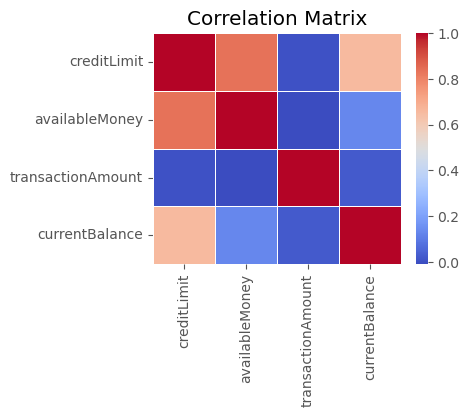

In [ ]:
import numpy as np
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
numeric_df.corr()

,creditLimit,availableMoney,transactionAmount,currentBalance
creditLimit,1.000000,0.834977,0.005581,0.653652
availableMoney,0.834977,1.000000,-0.010070,0.129332
transactionAmount,0.005581,-0.010070,1.000000,0.023905
currentBalance,0.653652,0.129332,0.023905,1.000000


#### Key Takeaways

1. **Credit Limit and Available Money:**
   - There is a strong positive correlation (0.83) between `creditLimit` and `availableMoney`. This indicates that accounts with higher credit limits tend to have more available money.

2. **Credit Limit and Current Balance:**
   - A moderate positive correlation (0.65) exists between `creditLimit` and `currentBalance`, suggesting that accounts with higher credit limits also tend to have higher current balances.

3. **Transaction Amount:**
   - `transactionAmount` shows very low correlation with other variables, suggesting that the amount of a transaction is not directly influenced by the credit limit, available money, or current balance.

4. **Available Money and Current Balance:**
   - A weak positive correlation (0.13) between `availableMoney` and `currentBalance` indicates a slight tendency for accounts with more available money to also have higher current balances, although the relationship is not strong.

The correlation analysis reveals significant relationships between `creditLimit`, `availableMoney`, and `currentBalance`, which are expected, as these variables are inherently related to the financial status of an account. However, `transactionAmount` appears to be relatively independent, which is valuable for modeling purposes as it suggests that transaction amounts can vary widely irrespective of the account's financial status.

Understanding these correlations is crucial for feature engineering and model building, as it highlights which features might provide more independent information for detecting fraudulent transactions.

## 4. Categorical Analysis

In [ ]:
categorical_features = [
    'merchantName', # checked separately
    'acqCountry',
    'merchantCountryCode',
    'posEntryMode',
    'posConditionCode',
    'merchantCategoryCode',  # checked separately
    'transactionType', # checked separately
    'cardPresent',
    'expirationDateKeyInMatch',
    # 'isFraud', # unnecessary
    # 'merchantState', # no data
    # 'CVV_Match' # not yet produced
]

In [ ]:
func.print_freq_target_rate(df, categorical_features)

Frequency, Proportion, Fraud Counts, and Fraud Rates Table for 'merchantName':
                       Frequency  Proportion% Fraud_Count  Fraud_Rate%
merchantName                                                          
In-N-Out #949129              89         0.01          10        11.24
American Airlines          3,139         0.40         295         9.40
In-N-Out #863086              96         0.01           9         9.38
In-N-Out #463194              96         0.01           8         8.33
In-N-Out #422833             110         0.01           9         8.18
...                          ...          ...         ...          ...
Quizno's #923583              98         0.01           0         0.00
Golds Gym #747443             36         0.00           0         0.00
Quizno's #906442              96         0.01           0         0.00
Golds Gym #747766             32         0.00           0         0.00
Planet Fitness #254202        28         0.00           0         0.0

In [ ]:
df['transactionType'] = df['transactionType'].replace('ADDRESS_VERIFICATION', 'ADD_VERI')

In [ ]:
categorical_features2 = [
    # 'merchantName', # checked separately
    'acqCountry',
    'merchantCountryCode',
    'posEntryMode',
    'posConditionCode',
    # 'merchantCategoryCode',  # checked separately
    'transactionType', # checked separately
    'cardPresent',
    'expirationDateKeyInMatch',
    # 'isFraud', # unnecessary
]

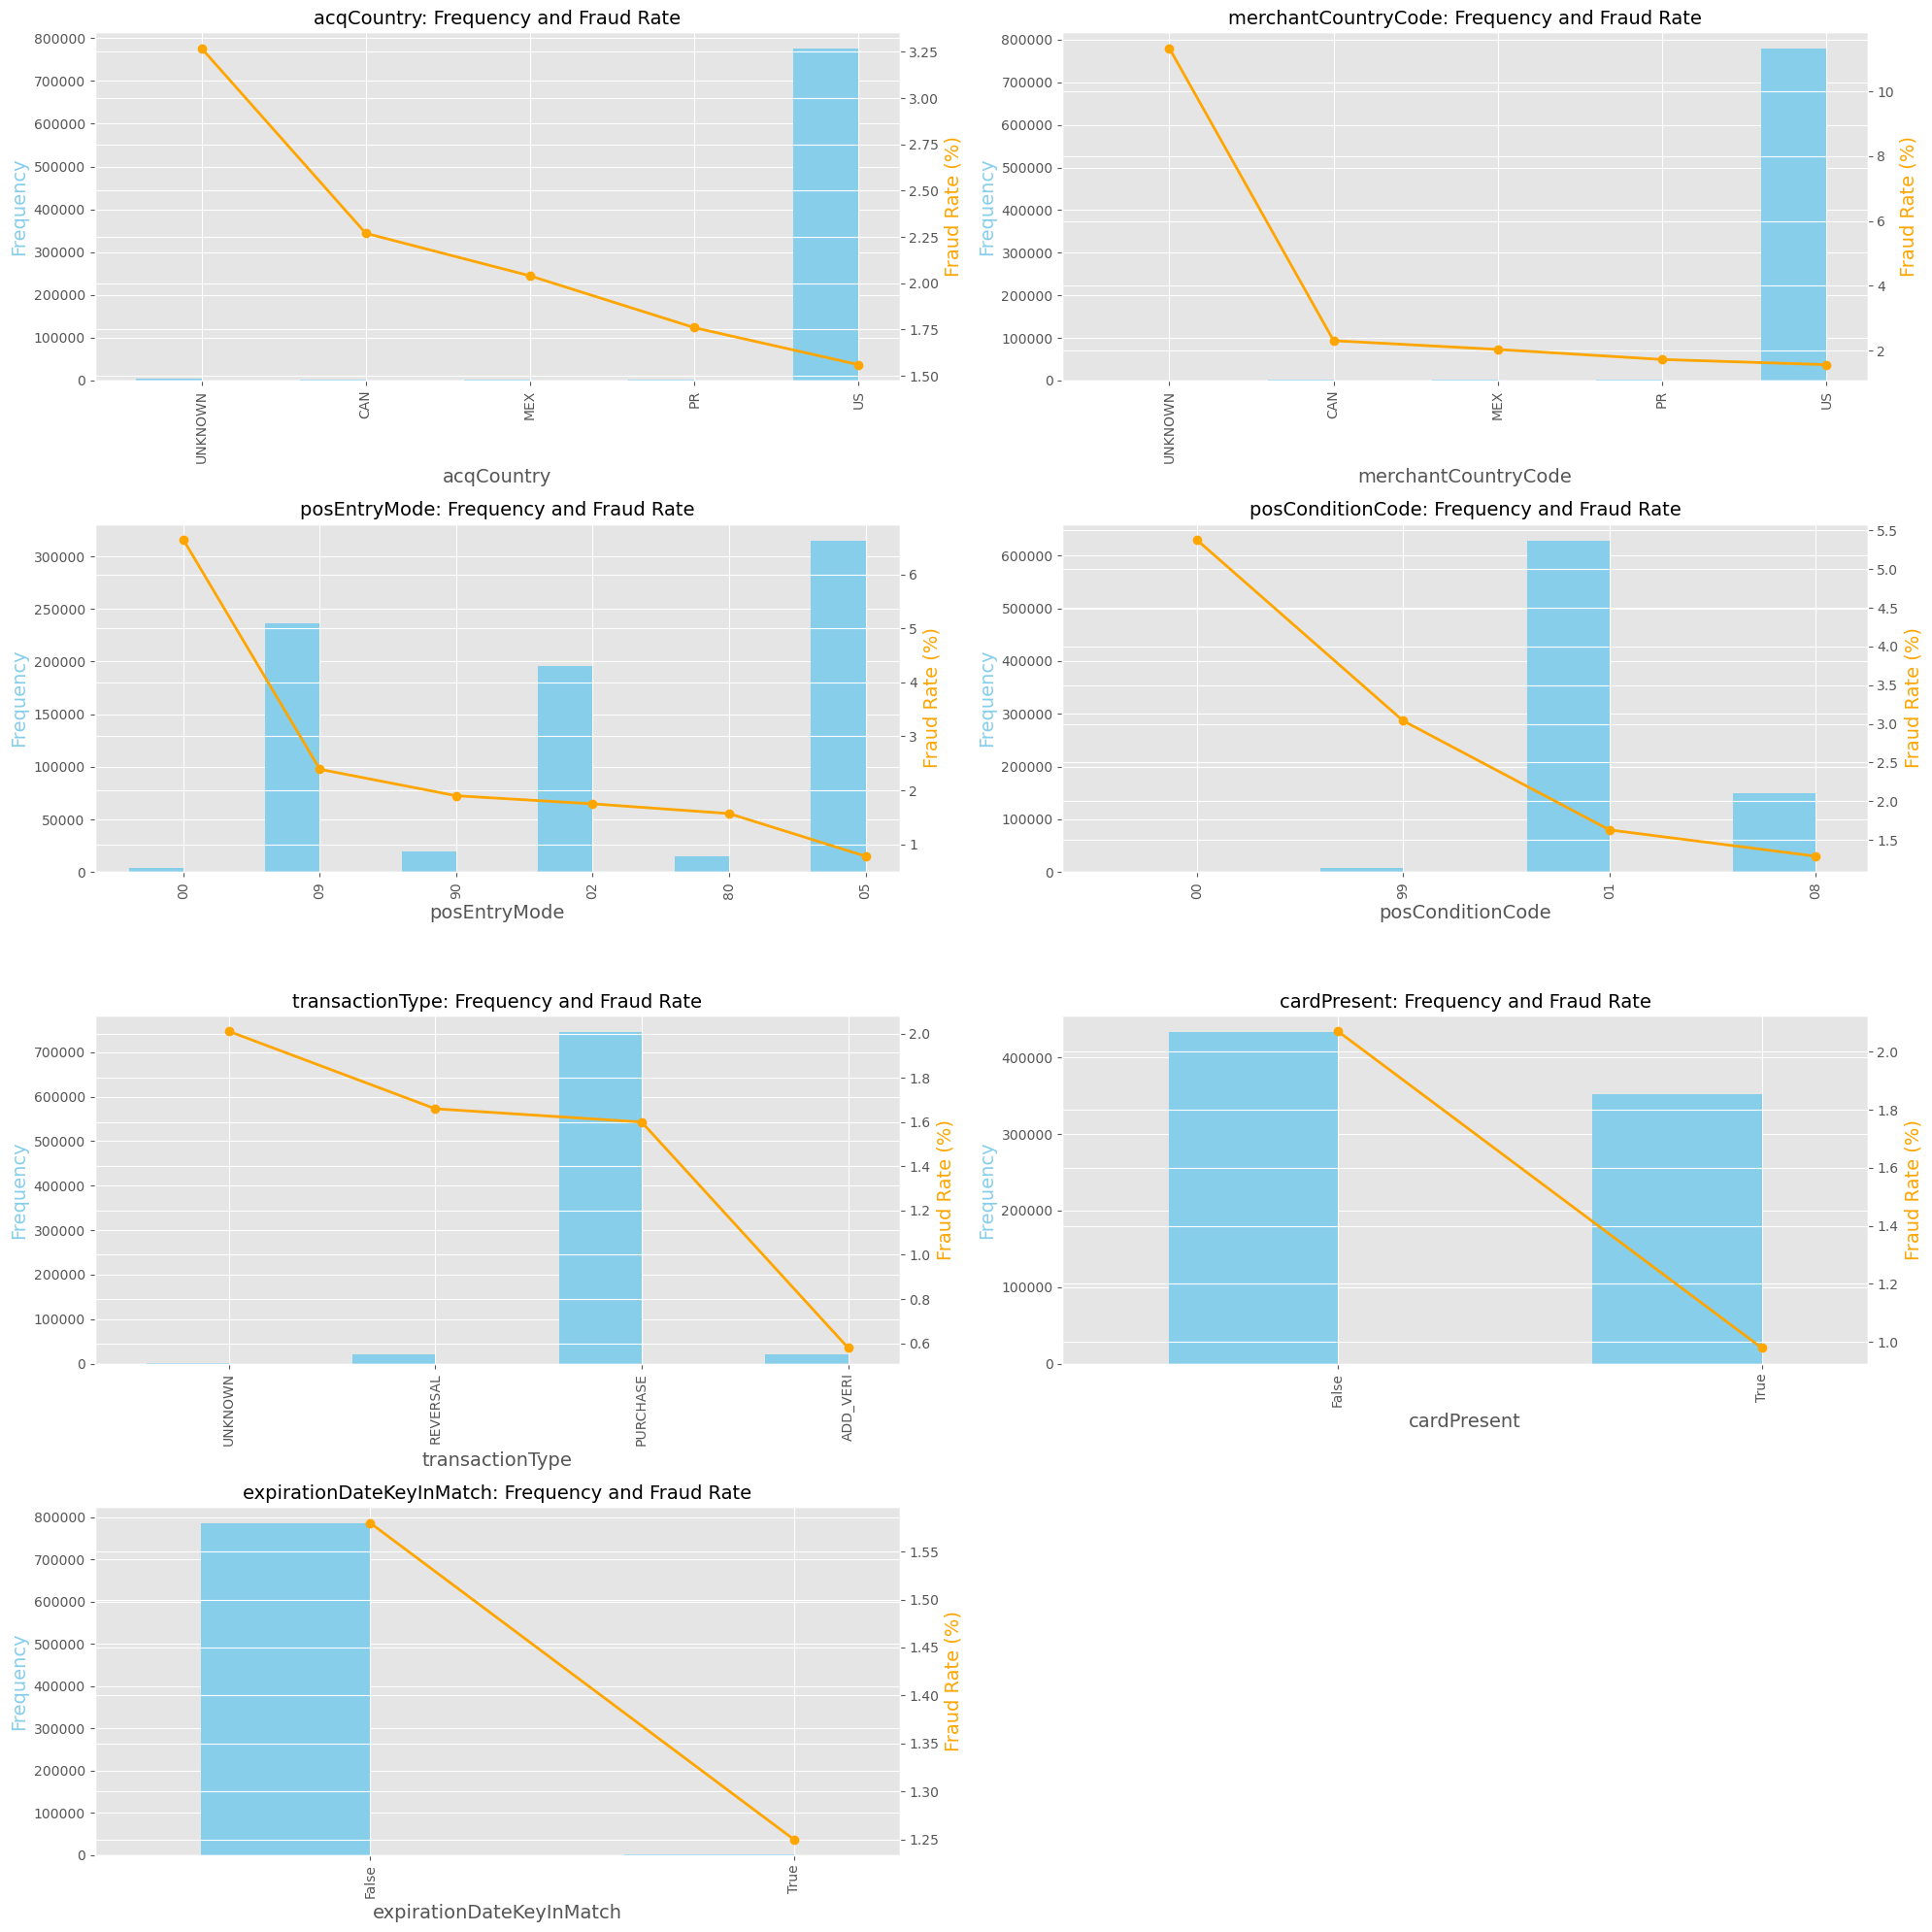

In [ ]:
func.plot_freq_target_rate_multi(df, categorical_features2)

#### Key Takeaways

1. **merchantName:** 
   - Certain establishments, such as In-N-Out, experience very high fraud rates exceeding 8%. Similarly, American Airlines faces a high fraud rate of 9.4% and a substantial volume of transactions, totaling 3,139.

2. **acqCountry:**
   - An unknown country has the highest fraud rate at 3.27% with a significant number of transactions totaling 4,562. Meanwhile, the U.S. accounts for the majority of transactions at 98.5%..

3. **merchantCountryCode:**
   - An unknown country has the highest fraud rate at 3.27% despite having a very small number of transactions totaling 724. Meanwhile, the U.S. accounts for the majority of transactions at 99%.

4. **posEntryMode:**
   - Transactions with missing entry mode (00) have the highest fraud rate at 6.64%. 'Manual Entry' (09) follows with a fraud rate of 2.39% and a significant volume of 236,481 transactions. The 'Chip' (05) method has the lowest fraud rate at 0.78%. 'Magnetic Stripe Fallback' (90) shows a slightly higher than average fraud rate, as these transactions initially attempted using the chip but reverted to the magnetic stripe due to chip failure or unavailability.

5. **posConditionCode:**
   - Transactions with a missing condition code (00) have the highest fraud rate at 5.38%. 'Unknown' (99) follows with a fraud rate of 3.04%. Transactions conducted via mail or telephone order (08) have a slightly lower than average fraud rate. Normal transactions (01) constitute the majority, accounting for 80% of the total transactions.
   
6. **merchantCategoryCode:**
   - The airline merchant category has the highest fraud rate at 3.46%. Rideshare, online retail, and gifts also have above-average fraud rates.
   
7. **transactionType:**
   - Transactions with missing information have the highest fraud rate at 2%, while address-verified transactions have the lowest fraud rate at 0.58%, with a significant volume of 20,169.
   
8. **cardPresent:**
   - Card-not-present transactions have the highest fraud rate at 2.07% and constitute a significant portion of 55% of all transactions, whereas other types of transactions have a fraud rate of 0.98%.

9. **expirationDateKeyInMatch:**
   - Transactions where the expirationDateKeyInMatch is false account for 99.9% of cases, which is unusual because the keyed-in expiration date should typically match the card's expiration date. This data seems biased and should be double-checked for accuracy.

Specific establishments like In-N-Out and American Airlines show high fraud rates (>8% and 9.4%, respectively). An unknown country has the highest fraud rate (3.27%) with 4,562 transactions, while the U.S. handles the majority of transactions at 98.5%. Missing entry modes (00) and manual entries (09) have notably high fraud rates (6.64% and 2.39%, respectively), whereas chip-based transactions (05) have the lowest at 0.78%. Transactions with missing condition codes (00) and those conducted via mail/telephone orders (08) also exhibit high fraud rates. The airline merchant category leads with a 3.46% fraud rate. Card-not-present transactions have a 2.07% fraud rate, comprising 55% of all transactions. Additionally, nearly all transactions (99.9%) where the expiration date key-in match is false indicate potential data bias that needs further investigation.

## 5. Plot Histograms

In [ ]:
# Identify Target data categories
func.print_freq_target_rate(df, ['isFraud'])

fraud_rate = df['isFraud'].sum() / len(df) * 100
print(f"The fraud rate is {fraud_rate:,.2f}%")

Frequency, Proportion, Fraud Counts, and Fraud Rates Table for 'isFraud':
        Frequency  Proportion% Fraud_Count  Fraud_Rate%
isFraud                                                
True       12,417         1.58      12,417        100.0
False     773,945        98.42           0          0.0

The fraud rate is 1.58%


Text(0.5, 1.0, 'Distribution for the target columns')

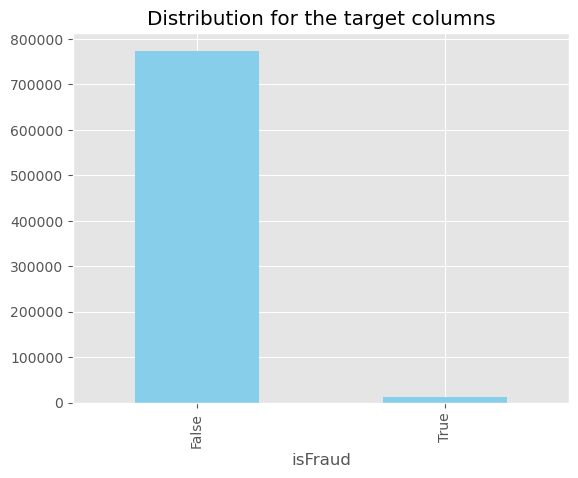

In [ ]:
df['isFraud'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution for the target columns')

In [ ]:
# Filter fraudulent transactions
fraud_transactions = df[df['isFraud'] == 1]

# Calculate the fraud transaction counts, total amount and average amount
fraud_count = fraud_transactions.shape[0]
fraud_amt = fraud_transactions['transactionAmount'].sum()
fraud_avg_amt = fraud_transactions['transactionAmount'].mean()

print(f"The total fraudulent transactions amount is ${fraud_amt:,.0f} observation with {fraud_count:,.0f} and average amount is ${fraud_avg_amt:,.2f}")
print(f"The total transactions amount is ${df['transactionAmount'].sum():,.0f} observation with {df.shape[0]:,.0f} and average amount is ${df['transactionAmount'].mean():,.2f}")

The total fraudulent transactions amount is $2,796,506 observation with 12,417 and average amount is $225.22
The total transactions amount is $107,720,459 observation with 786,362 and average amount is $136.99


#### Key Takeaways
1. **Fraud Transactions** The fraudulent transaction count is only 1.58% (12,417 transactions), whereas the legitimate (non-fradulent) transactions count is 773,945.
2. **Imbalanced Data Handling** This chart shows a significant imbalance in the dataset with much larger number of legitimate transactions. 
   - Techniques such as oversampling the minority class (fraud) or undersampling the majority class (legitimate) can be employed to address this bias.
3. **Business Impact** Although fraudulent transactions account for only 1.58% of the total, their impact on the business is substantial, amounting to $2.8 million in 2016, with an average transaction amount of $225.

### Histogram of Transaction Amounts

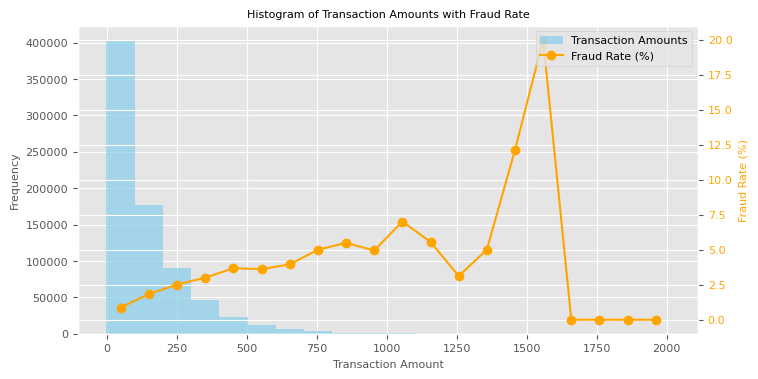

In [ ]:
func.plot_amount_target_rate(df, ['transactionAmount'])

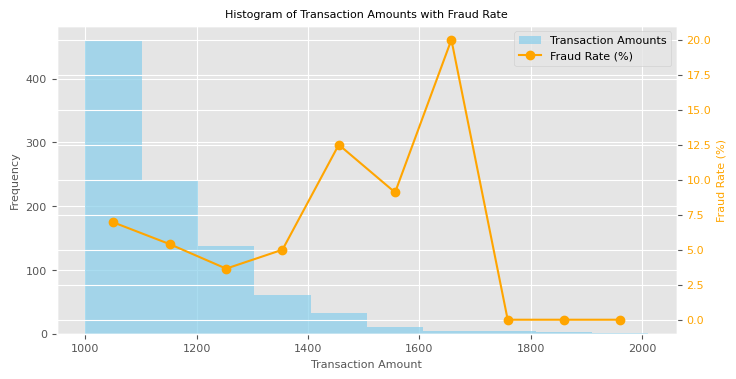

In [ ]:
# See the chart only for the transaction amount greater than $749
func.plot_amount_target_rate(df, ['transactionAmount'], bins=10, min_amount=1000)

In [ ]:
# Filter the dataframe for transaction amounts between 1500 and 1700
# df_filtered = df[(df['transactionAmount'] > 1500) & (df['transactionAmount'] <= 1700)]
df_filtered = df[df['transactionAmount'] > 1500]
df_filtered

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,expirationDateKeyInMatch,isFraud
61302,445843699,5000.0,2799.59,2016-07-08T05:56:56,1505.85,AMC #145832,US,US,05,01,...,01/2022,2015-06-30,2016-07-07,841,841,5882,PURCHASE,2200.41,False,False
65236,717547573,5000.0,4694.29,2016-02-22T17:21:57,1559.56,EZ Putt Putt #503815,US,US,05,99,...,01/2022,2014-01-02,2014-01-02,746,746,4864,PURCHASE,305.71,False,False
76137,124148804,5000.0,2923.68,2016-03-26T03:00:42,1506.57,Universe Massage #837002,US,US,05,01,...,04/2026,2009-04-11,2009-04-11,545,545,247,PURCHASE,2076.32,False,False
117981,174797260,2500.0,454.13,2016-05-05T05:48:00,1530.35,walmart.com,US,US,02,01,...,06/2027,2013-07-14,2013-07-14,337,337,1213,PURCHASE,2045.87,False,False
118175,751163173,15000.0,7540.96,2016-02-04T07:54:46,1500.25,AMC #74121,US,US,05,01,...,10/2022,2009-03-01,2009-03-01,590,590,9186,PURCHASE,7459.04,False,False
118859,760460532,50000.0,49049.79,2016-02-09T01:10:09,1541.68,pottery-barn.com,US,US,02,08,...,07/2023,2015-11-25,2015-11-25,454,454,5948,PURCHASE,950.21,False,False
270513,380680241,5000.0,2505.35,2016-12-02T20:14:22,1566.37,Fresh Flowers,US,US,02,01,...,02/2020,2014-06-21,2016-11-29,869,869,593,PURCHASE,2494.65,False,True
308816,654507597,500.0,480.98,2016-07-20T23:33:20,1704.55,Shake Shack #235531,US,US,02,01,...,12/2021,2013-11-23,2016-07-02,748,748,4127,PURCHASE,19.02,False,False
332972,748304722,15000.0,8224.26,2016-08-03T05:20:21,1548.47,target.com,US,US,00,01,...,03/2026,2013-11-24,2016-07-23,637,637,6516,PURCHASE,6775.74,False,False
367497,428730538,5000.0,507.05,2016-10-14T13:49:27,1689.71,Krispy Kreme #375200,US,US,02,01,...,06/2028,2014-03-18,2016-01-19,988,988,3914,PURCHASE,4492.95,False,False


In [ ]:
# Identify Target data categories when the transaction amount above $1,500
func.print_freq_target_rate(df_filtered, ['isFraud'])

Frequency, Proportion, Fraud Counts, and Fraud Rates Table for 'isFraud':
        Frequency  Proportion% Fraud_Count  Fraud_Rate%
isFraud                                                
True            2          8.0           2        100.0
False          23         92.0           0          0.0



#### Key takeaways
1. The frequency of transactions decreases as the transaction amount increases.
2. The fraud rate gradually increases with transaction amounts up about $1,500.
3. There is a significant spike in fraud rate at around $1,500, peacking close to 20%. 
4. After $1,500, the fraud rate drops sharply and stablizes at a lower level for higher transaction amounts.
5. The transactions with amounts greater than $1,500 have a fraud rate of 8%, even though there are only 25 transactions.

### Histogram of merchantCategoryCode

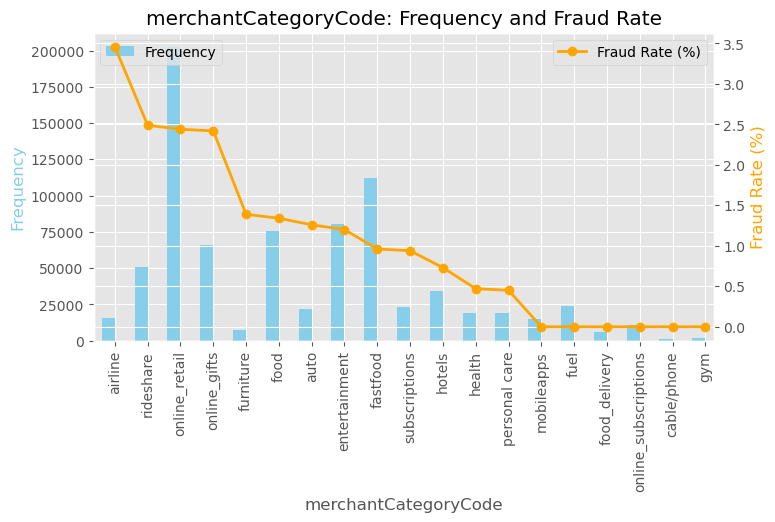

In [ ]:
func.plot_freq_target_rate(df, ['merchantCategoryCode'])

#### Key Takeaways
1. The `airline` has the highest fraud rate despite having low transactions, followed by `rideshare` and `online_retail`. 
2. The `oneline_retail` also has the siginificant transactions, indicating high consumer activity in these categories. 
3. Categories like `fastfood`, `hotels`, `subscriptions`, `food`, and `personal care` show moderate transaction frequencies and varied fraud rates.
4. The `fuel`, `mobileapps`, `food_delivery` and `gym` have low fraud rates, indicating these are relatively safe categories with fewer fraudulent activities.

### Histogram all continuous variables

In [ ]:
continuous_features = [
    'creditLimit', 
    'availableMoney',
    # 'transactionAmount',
    'currentBalance'
]

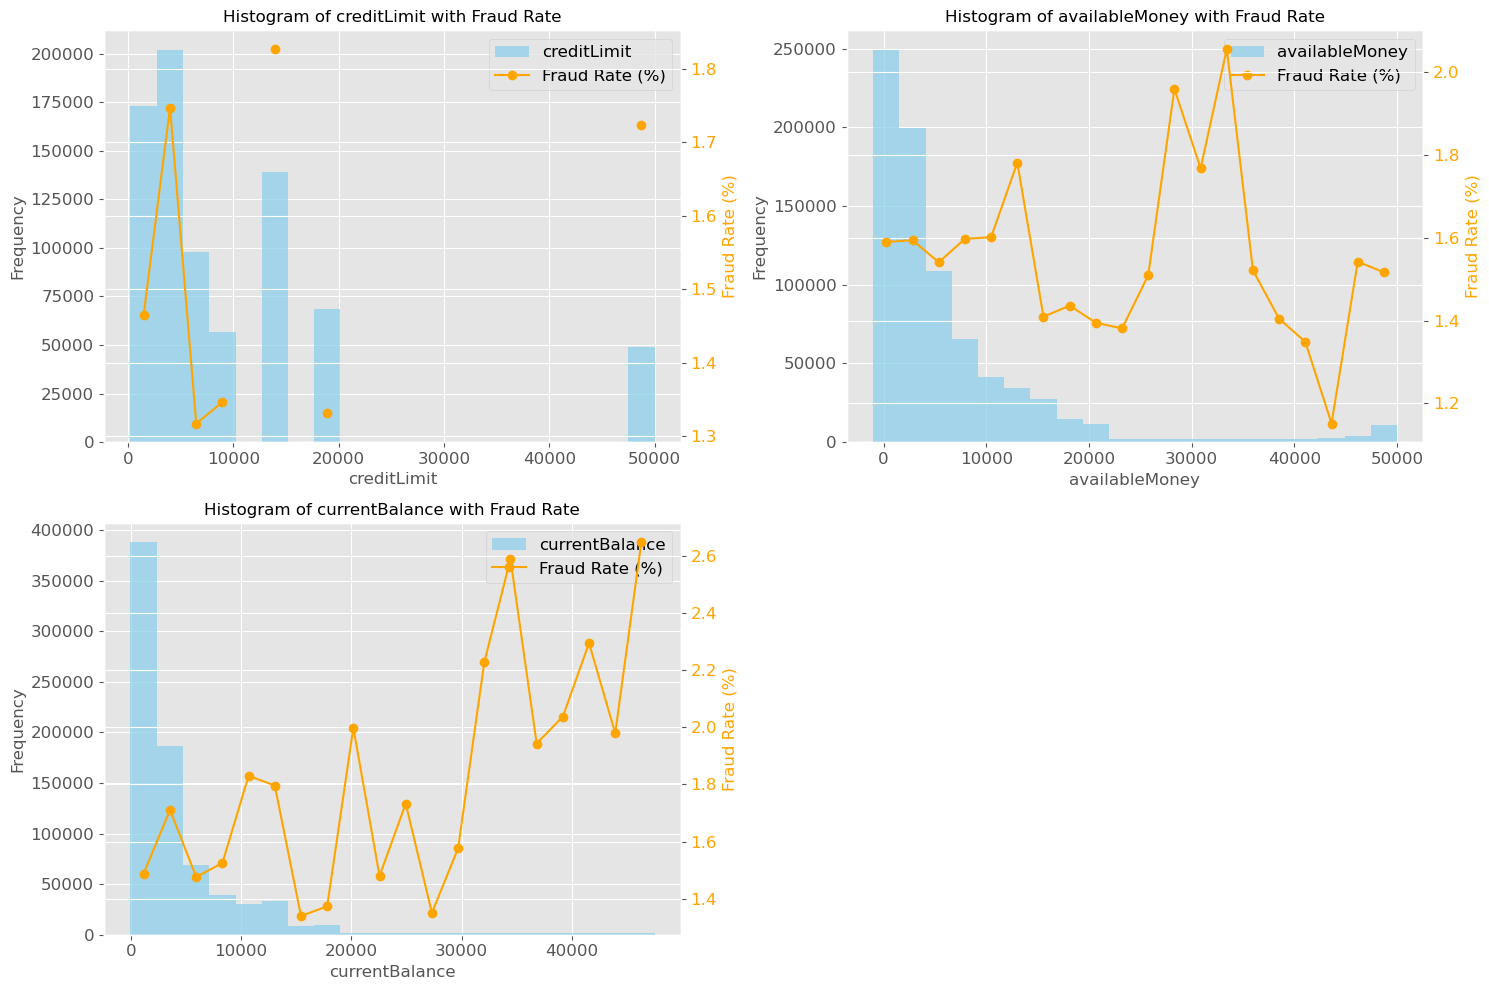

In [ ]:
func.plot_amount_target_rate_multi(df, continuous_features)

#### Key Takeaways
1. **creditLimit**: Skewed toward lower values, with the highest frequency for credit limites below $10,000, while the fraud rate varies across different credit limit ranges, peaking around the lowest and mid-range values. 
2. **availableMoney**: Shows a higher frequency at lower amounts, while the fraud rate increases with available money, peaking around $25,000 to $35,000, indicating highder fraud rates for higher available money amounts.
3. **currentBalance**: Shows a high frequency for balances below $2,000. The fraud rate shows a sharp increase for balances around $1,000 to $2,000 and fluctuates for higher balances.


## 6. Feature Engineering 
Add and transform new features based on the assumptions and findings

### Assumption 1
There would be a correlation between fraud rates and financial metrics such as transaction amount, available money, and current balance relative to the credit limit.

In [ ]:
# Enhanced Feature Engineering
df['transactionAmountToCreditLimit'] = df['transactionAmount'] / df['creditLimit']
df['availableMoneyToCreditLimit'] = df['availableMoney'] / df['creditLimit']
df['currentBalanceToCreditLimit'] = df['currentBalance'] / df['creditLimit']

In [ ]:
continuous_features2 = [
    'transactionAmountToCreditLimit', 
    'availableMoneyToCreditLimit',
    'currentBalanceToCreditLimit'
]

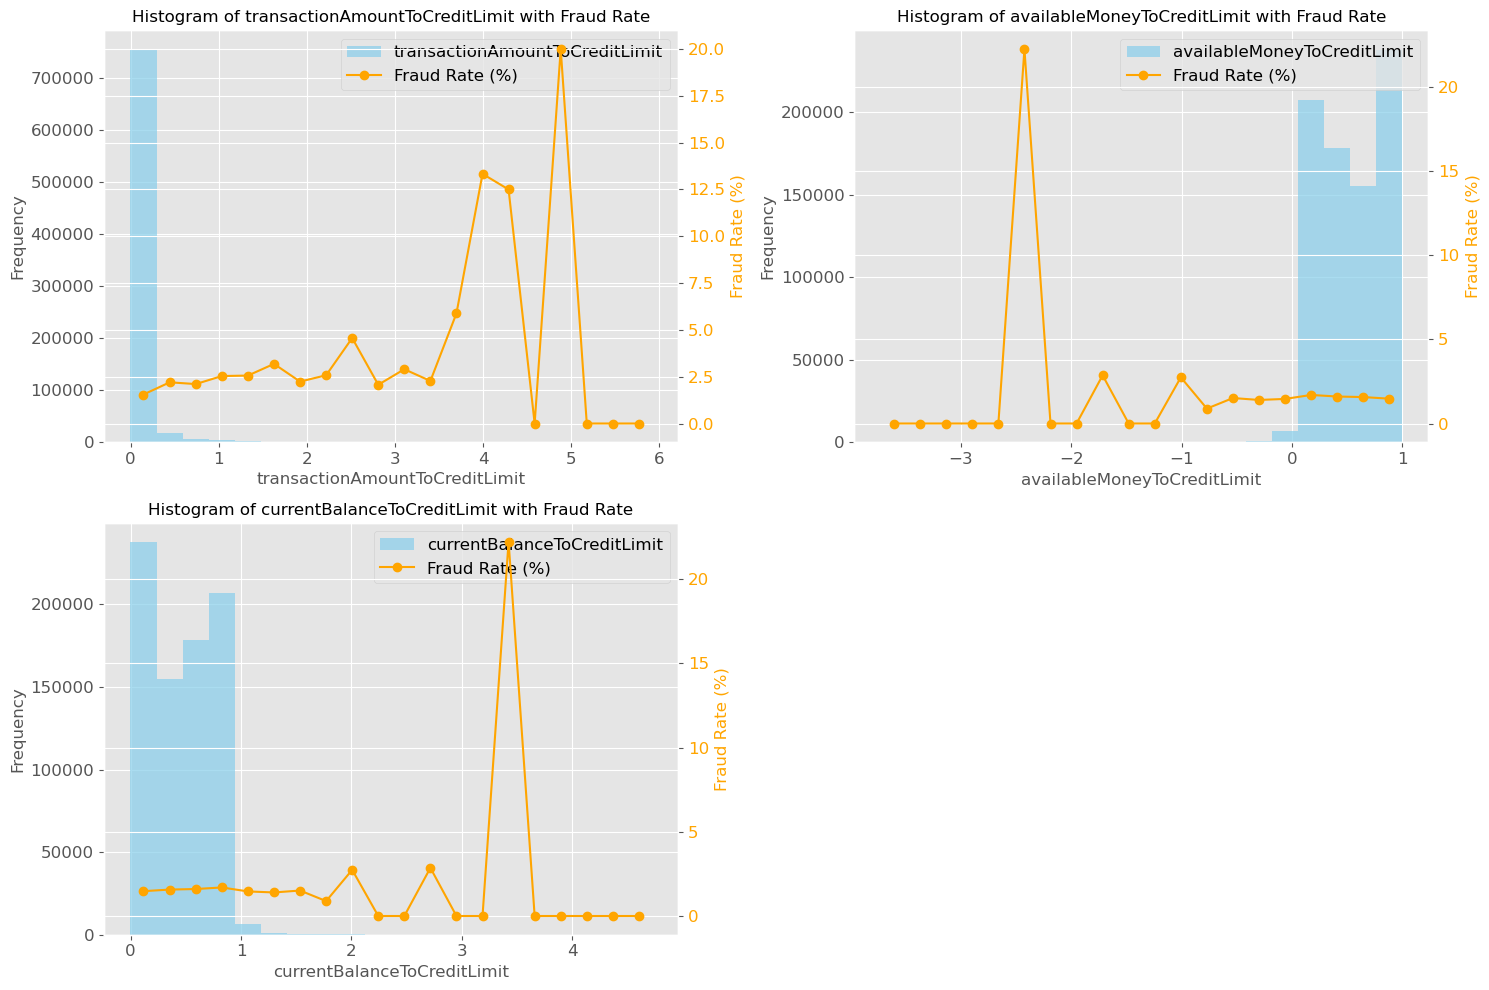

In [ ]:
func.plot_amount_target_rate_multi(df, continuous_features2)

#### Key Takeaway
The `transaction amount to credit limit` ratio increases, the fraud rate spikes significantly around the ratio of 5%. The second chart indicates high fraud rate when `the available money to credit limit ratio` is around -2.5%, suggesting potential fraud risk when credit limits are significantly exceeded. The `current balance to credit limit ratio` has a sharp increase in fraud rate near the ratio of 2%.

### Assumption 2
There is likely a correlation between fraud rates and time metrics such as transaction day, month, and hour, as well as account age, days since the last address change, and days remaining until the expiration date at the time of the transaction.

In [ ]:
# Covert object datatype to timeseries
df.transactionDateTime = pd.to_datetime(df.transactionDateTime ) 
df.currentExpDate = pd.to_datetime(df.currentExpDate)
df.accountOpenDate = pd.to_datetime(df.accountOpenDate)
df.dateOfLastAddressChange = pd.to_datetime(df.dateOfLastAddressChange)

# make date columns to work in model
df['transactionDay'] = df['transactionDateTime'].dt.day
df['transactionMonth'] = df['transactionDateTime'].dt.month
df['transactionHour'] = df['transactionDateTime'].dt.hour
df['transactionDayOfWeek'] = df['transactionDateTime'].dt.dayofweek
df['accountAgeInMonths'] = (df['transactionDateTime'] - df['accountOpenDate']).dt.days // 30
df['daysSinceLastAddressChange'] = (df['transactionDateTime'] - df['dateOfLastAddressChange']).dt.days
df['cardExpirationInMonths'] = (df['currentExpDate'] - df['transactionDateTime']).dt.days // 30

In [ ]:
continuous_features3 = [
    'transactionDay', 
    'transactionMonth',
    'transactionHour',
    'transactionDayOfWeek',
    'accountAgeInMonths',
    'daysSinceLastAddressChange',
    'cardExpirationInMonths'
]

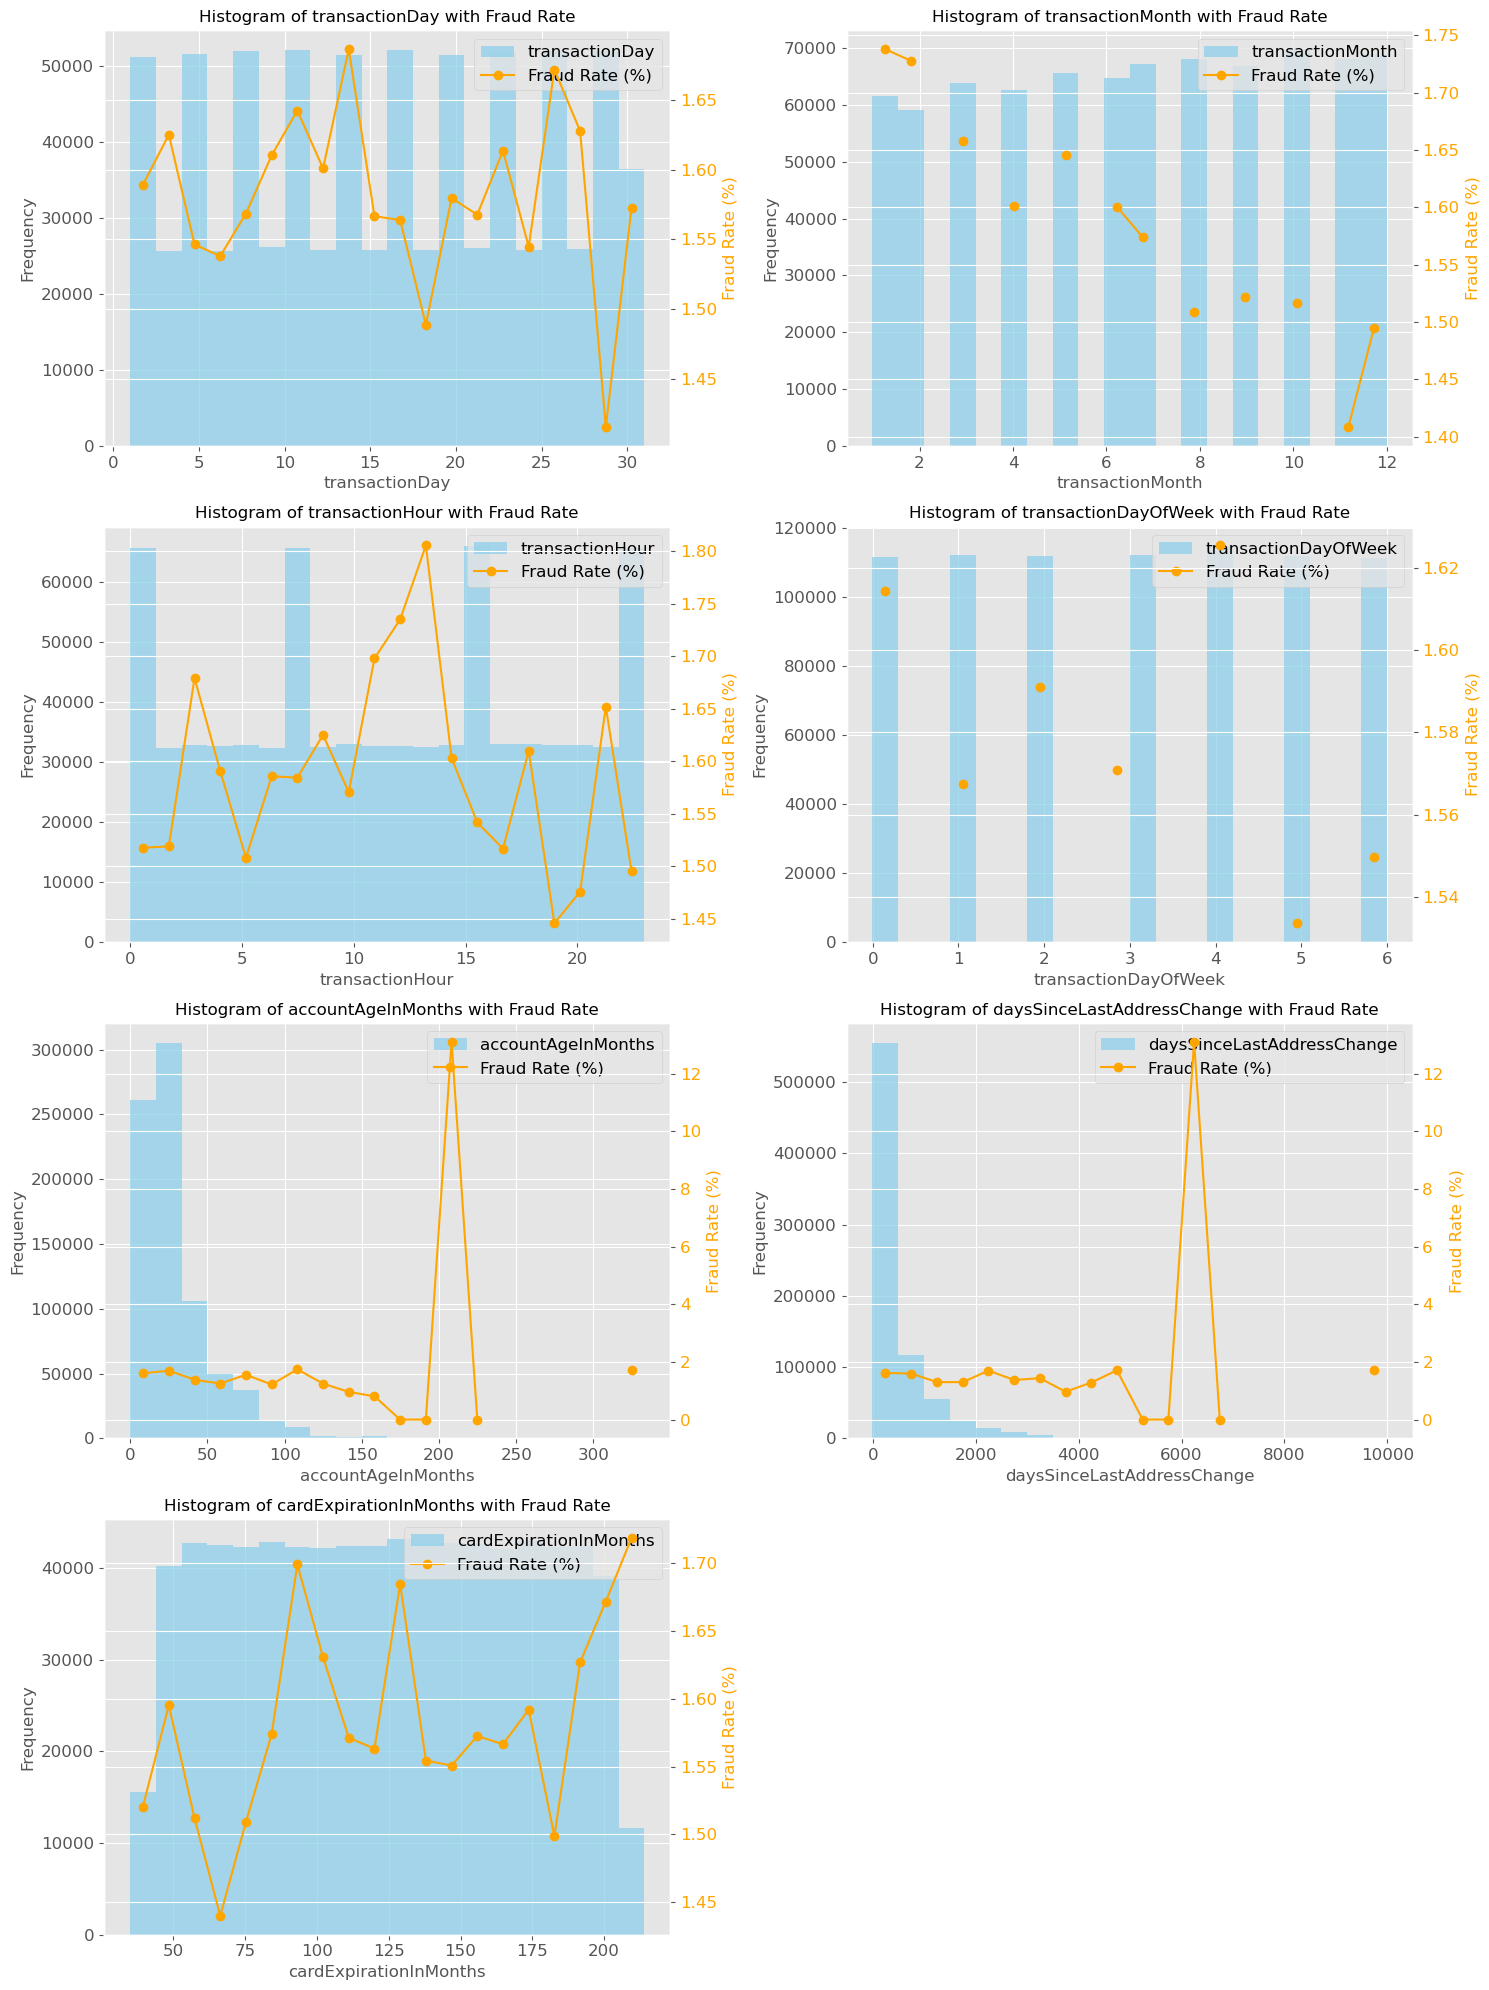

In [ ]:
func.plot_amount_target_rate_multi(df, continuous_features3)

#### Key Takeaways
The first four histograms show how fraud rates vary by transaction timing. Fraud rates fluctuate slightly throughout the `month`, with peaks on specific `days`. Monthly fraud rates are mostly stable, *dipping in December*. `Hourly` fraud rates *rise in early morning and late evening*. `Weekly` fraud rates show minimal variation. Overall, there are minor temporal patterns in fraud occurrence.

The last three histograms show that fraud rates *peak sharply around 200 months* of `account age` and *6,000 days* `since the last address change`, *though these are rare*. `Card expiration` displays more *consistent fluctuations*, *with slightly higher fraud rates as expiration nears*. Older accounts and `long periods since the last address change` are linked to *higher fraud at specific points.*


### Assumption 3
There is a high likelihood of fraudulent transactions when the entered CVV does not match the card's CVV.

In [ ]:
df['CVV_Match'] = df['cardCVV'] == df['enteredCVV']
df['CVV_Match'] = df['CVV_Match'].astype(int)

print("Data with new CVV_Match variable:")
print(df[['cardCVV', 'enteredCVV', 'CVV_Match']].head())

Data with new CVV_Match variable:
  cardCVV enteredCVV  CVV_Match
0     486        486          1
1     486        486          1
2     486        486          1
3     885        885          1
4     885        885          1


In [ ]:
func.print_freq_target_rate(df, ['CVV_Match'])

Frequency, Proportion, Fraud Counts, and Fraud Rates Table for 'CVV_Match':
          Frequency  Proportion% Fraud_Count  Fraud_Rate%
CVV_Match                                                
0             7,015         0.89         203         2.89
1           779,347        99.11      12,214         1.57



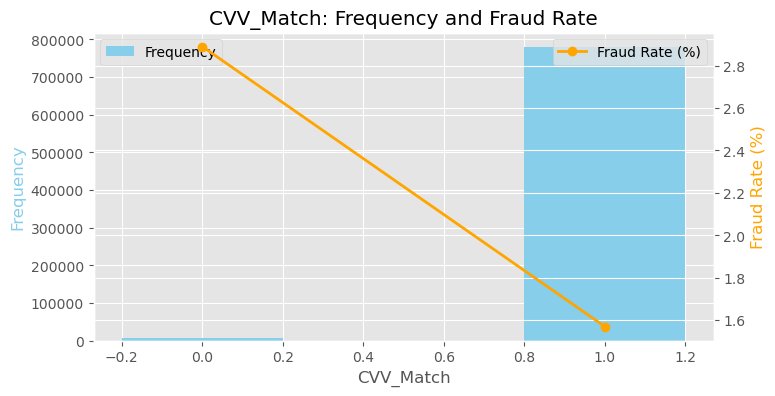

In [ ]:
func.plot_freq_target_rate2(df, ['CVV_Match'])

#### Key Takeaways
This highlights a strong correlation between non-matching CVVs and increased likelihood of fraudulent transactions.
- The majority of transactions have a matching CVV (CVV_Match == 1), which are associated with a lower fraud rate of around 1.6%. 
- In contrast, transactions with a non-matching CVV (CVV_Match == 0) exhibit a significantly higher fraud rate of approximately 2.8%. 


### Assumption 4
There are some customers who are making fraudulent transactions frequently. 

Text(0.5, 0, 'Account Number')

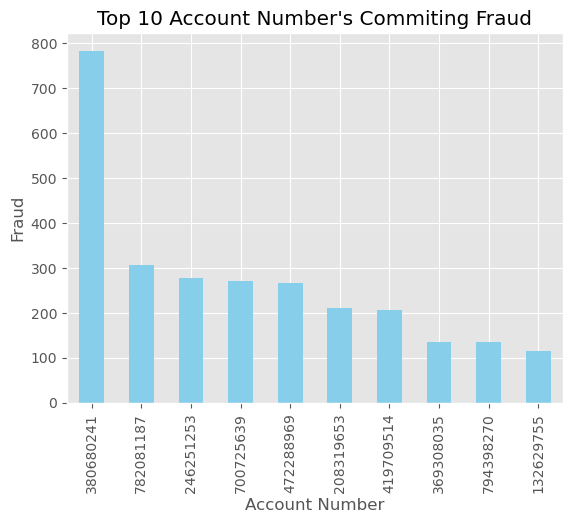

In [ ]:
df[(df['isFraud']==1)]['accountNumber'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Account Number's Commiting Fraud")
plt.ylabel("Fraud")
plt.xlabel("Account Number")

### Key Takeaways
This indicates a significant disparity in fraud activity across different accounts. The account number 380608241 has the most significant number of fraud cases, with nearly 800 incidents. The remaining nine account numbers show progressively fewer fraud cases, with each having between approximately 100 and 300 incidents.

## 7. Data Wrangling

In [ ]:
total_amount = df['transactionAmount'].sum()
total_count = len(df)

print(f"total_amount: ${total_amount:,.2f}")
print(f"total_count: {total_count:,.2f}")

total_amount: $107,720,458.98
total_count: 786,362.00


### 7-1. Reversed Transactions

In [ ]:
df['transactionType'].unique()

array(['PURCHASE', 'ADD_VERI', 'REVERSAL', 'UNKNOWN'], dtype=object)

In [ ]:
# reversed transaction
df_reversed = df[df.transactionType=='REVERSAL']
df_reversed

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,availableMoneyToCreditLimit,currentBalanceToCreditLimit,transactionDay,transactionMonth,transactionHour,transactionDayOfWeek,accountAgeInMonths,daysSinceLastAddressChange,cardExpirationInMonths,CVV_Match
38,574788567,2500.0,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,09,01,...,0.880392,0.119608,24,5,1,1,7,224,65,1
72,574788567,2500.0,2432.72,2016-10-07 10:23:57,3.87,Eazy Repair,US,US,05,01,...,0.973088,0.026912,7,10,10,4,12,360,72,1
100,924729945,50000.0,49831.43,2016-10-19 14:01:45,168.57,discount.com,US,US,05,01,...,0.996629,0.003371,19,10,14,2,27,817,97,0
132,984504651,50000.0,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,05,01,...,0.927348,0.072652,16,1,9,5,5,173,152,1
155,984504651,50000.0,41909.30,2016-01-25 20:39:15,81.73,AMC #724446,US,US,09,01,...,0.838186,0.161814,25,1,20,0,6,182,192,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786105,899818521,2500.0,968.33,2016-09-29 02:04:32,10.05,cheapfast.com,US,US,02,99,...,0.387332,0.612668,29,9,2,3,40,1202,174,1
786119,638498773,10000.0,9798.21,2016-01-01 19:48:03,201.79,KFC #928167,US,US,05,01,...,0.979821,0.020179,1,1,19,4,13,410,204,1
786218,638498773,10000.0,5331.33,2016-11-03 04:23:26,86.14,Dunkin' Donuts #396342,US,US,05,01,...,0.533133,0.466867,3,11,4,3,23,717,101,1
786224,638498773,10000.0,4393.10,2016-11-06 22:54:25,49.39,Shake Shack #118502,US,US,05,01,...,0.439310,0.560690,6,11,22,6,24,720,152,1


In [ ]:
reversed_total = df_reversed['transactionAmount'].sum()
reversed_count = len(df_reversed)
avg_reversed_amount = reversed_total / (reversed_count)  # Since each pair includes a positive and a negative

reversed_proportion_amount = reversed_total / total_amount * 100
reversed_proportion_count = reversed_count / total_count * 100

print(f"reversed_total: ${reversed_total:,.2f}")
print(f"reversed_count: {reversed_count:,.2f}")
print(f"Average Reversed Transaction Amount: ${avg_reversed_amount:,.2f}")
print(f"Proportion of Reversed Transactions Amount: {reversed_proportion_amount:.2f}%")
print(f"Proportion of Reversed Transactions Count: {reversed_proportion_count:.2f}%")

reversed_total: $2,821,792.50
reversed_count: 20,303.00
Average Reversed Transaction Amount: $138.98
Proportion of Reversed Transactions Amount: 2.62%
Proportion of Reversed Transactions Count: 2.58%


In [ ]:
# Fraud calculation within reversed transactions
df_reversed_fraud = df_reversed[df_reversed['isFraud'] == 1]
reversed_fraud_total = df_reversed_fraud['transactionAmount'].sum()
reversed_fraud_count = len(df_reversed_fraud)
avg_reversed_fraud_total = reversed_fraud_total / reversed_fraud_count

print(f"Fraud Amount in Reversed: ${reversed_fraud_total:,.2f}")
print(f"Fraud Count in Reversed: {reversed_fraud_count:,.2F}")
print(f"Average Fraud Amount in Reversed: {avg_reversed_fraud_total:,.2F}")

Fraud Amount in Reversed: $76,811.80
Fraud Count in Reversed: 337.00
Average Fraud Amount in Reversed: 227.93


In [ ]:
# Add new feature to identify the reversal transactions
df['flag_reversed'] = df.isin(df_reversed).all(axis=1)
func.print_freq_target_rate(df, ['flag_reversed'])

Frequency, Proportion, Fraud Counts, and Fraud Rates Table for 'flag_reversed':
              Frequency  Proportion% Fraud_Count  Fraud_Rate%
flag_reversed                                                
True             20,303         2.58         337         1.66
False           766,059        97.42      12,080         1.58



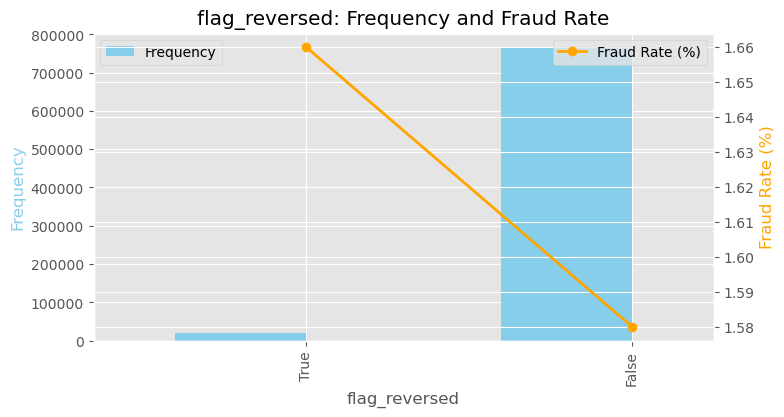

In [ ]:
func.plot_freq_target_rate(df, ['flag_reversed'])

### 7-2. Multi-swipe Transactions

In [ ]:
# Ensure transactionDateTime is in datetime format
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

# Sort by account number and transaction datetime
df.sort_values(by=['accountNumber', 'transactionDateTime'], inplace=True)

# Calculate time difference between consecutive transactions
df['time_diff'] = df.groupby('accountNumber')['transactionDateTime'].diff().dt.total_seconds()

# Define a time window in 10 minutes for multi-swipe detection, e.g., 600 seconds == 10 minutes
time_window = 600

# Flag multi-swipe incidents
df['is_multi_swipe'] = (
    (df['time_diff'] <= time_window) &
    (df['transactionAmount'] == df.groupby('accountNumber')['transactionAmount'].shift(1)) &
    (df['merchantName'] == df.groupby('accountNumber')['merchantName'].shift(1))
)

# multi-swipe transactions
df_multi_swipe = df[df['is_multi_swipe']]
df_multi_swipe

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,transactionMonth,transactionHour,transactionDayOfWeek,accountAgeInMonths,daysSinceLastAddressChange,cardExpirationInMonths,CVV_Match,flag_reversed,time_diff,is_multi_swipe
541955,100088067,50000.0,49275.09,2016-10-16 18:01:02,411.35,Fresh Flowers,US,US,02,08,...,10,18,6,33,1011,38,1,False,2.0,True
541963,100088067,50000.0,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,01,...,11,8,6,34,1046,42,1,True,179.0,True
87919,100328049,5000.0,4605.10,2016-01-15 20:36:18,43.74,Lyft,US,US,09,08,...,1,20,4,24,738,137,1,True,103.0,True
151426,100737756,250.0,-44.75,2016-01-18 01:55:28,693.50,Franks Deli,US,US,05,01,...,1,1,0,7,211,110,1,False,4.0,True
151427,100737756,250.0,-535.03,2016-01-18 01:58:26,693.50,Franks Deli,US,US,05,01,...,1,1,0,7,211,110,1,False,178.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569653,999257059,15000.0,14177.84,2016-01-14 16:51:22,47.58,Wall Street News,US,US,09,01,...,1,16,3,2,81,47,1,False,161.0,True
569750,999257059,15000.0,14322.20,2016-08-09 11:25:46,557.11,Washington Times,US,US,05,01,...,8,11,1,9,289,191,1,True,17.0,True
545535,999258704,5000.0,4246.82,2016-03-16 07:14:17,367.13,Uber,US,US,09,01,...,3,7,2,2,85,48,1,True,29.0,True
545580,999258704,5000.0,4865.17,2016-09-02 03:33:07,72.93,gap.com,US,US,09,01,...,9,3,4,8,255,105,1,True,70.0,True


In [ ]:
# Identifying multi-swipe transactions (same amount, close timestamps)
# multi_swipe_transactions = df[df.duplicated(subset=['transactionAmount', 'accountNumber', 'merchantName', 'transactionDateTime'], keep=False)]

multi_swipe_total = df_multi_swipe['transactionAmount'].sum()
multi_swipe_count = len(df_multi_swipe)
avg_multi_swipe_amount = multi_swipe_total / (multi_swipe_count / 2)  # Since each multi-swipe includes multiple entries of the same amount

multi_swipe_proportion_amount = multi_swipe_total / total_amount * 100
multi_swipe_proportion_count = multi_swipe_count / total_count * 100

print(f"multi_swipe_total: ${multi_swipe_total:,.2f}")
print(f"multi_swipe_count: {multi_swipe_count:,.2f}")
print(f"Average Multi-swipe Transaction Amount: ${avg_multi_swipe_amount:,.2f}")
print(f"Proportion of Multi-swipe Transactions Amount: {multi_swipe_proportion_amount:.2f}%")
print(f"Proportion of Multi-swipe Transactions Count: {multi_swipe_proportion_count:.2f}%")

multi_swipe_total: $1,917,460.02
multi_swipe_count: 13,284.00
Average Multi-swipe Transaction Amount: $288.69
Proportion of Multi-swipe Transactions Amount: 1.78%
Proportion of Multi-swipe Transactions Count: 1.69%


In [ ]:
# Fraud calculation within multi-swipe transactions
df_multi_swipe_fraud = df_multi_swipe[df_multi_swipe['isFraud'] == 1]
multi_swipe_fraud_total = df_multi_swipe_fraud['transactionAmount'].sum()
multi_swipe_fraud_count = len(df_multi_swipe_fraud)
avg_multi_swipe_fraud_total = multi_swipe_fraud_total / multi_swipe_fraud_count

print(f"Fraud Amount in Multi-swipe: ${multi_swipe_fraud_total:,.2f}")
print(f"Fraud Count in Multi-swipe: {multi_swipe_fraud_count:,.2F}")
print(f"Average Fraud Amount in Multi-swipe: {avg_multi_swipe_fraud_total:,.2F}")

Fraud Amount in Multi-swipe: $52,321.11
Fraud Count in Multi-swipe: 230.00
Average Fraud Amount in Multi-swipe: 227.48


In [ ]:
# Add new feature to identify the multi-swipe transactions
df['flag_multi_swipe'] = df.isin(df_multi_swipe).all(axis=1)
func.print_freq_target_rate(df, ['flag_multi_swipe'])

Frequency, Proportion, Fraud Counts, and Fraud Rates Table for 'flag_multi_swipe':
                 Frequency  Proportion% Fraud_Count  Fraud_Rate%
flag_multi_swipe                                                
True                13,284         1.69         230         1.73
False              773,078        98.31      12,187         1.58



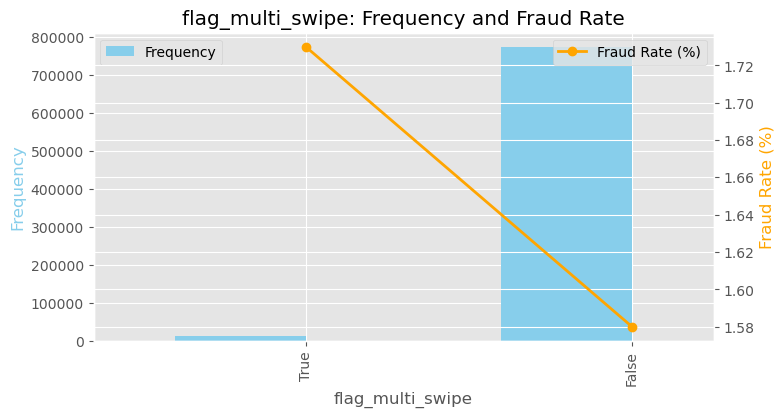

In [ ]:
func.plot_freq_target_rate(df, ['flag_multi_swipe'])

### 7-3. Subscribed Transactions
The assumption is that the subscribed Transactions are less likely to be fraudulent.

In [ ]:
# Identifying subscribed transactions (same amount, close timestamps, one is positive, one is negative)
df_subscribed = df[df.duplicated(subset=['transactionAmount', 'accountNumber', 'merchantName'], keep=False)]

subscribed_total = df_subscribed['transactionAmount'].sum()
subscribed_count = len(df_subscribed)
avg_subscribed_amount = subscribed_total / subscribed_count  # Since each pair includes a positive and a negative

subscribed_proportion_amount = subscribed_total / total_amount * 100
subscribed_proportion_count = subscribed_count / total_count * 100

print(f"subscribed_total: ${subscribed_total:,.2f}")
print(f"subscribed_count: {subscribed_count:,.2f}")
print(f"Average subscribed Transaction Amount: ${avg_subscribed_amount:,.2f}")
print(f"Proportion of subscribed Transactions Amount: {subscribed_proportion_amount:.2f}%")
print(f"Proportion of subscribed Transactions Count: {subscribed_proportion_count:.2f}%")

subscribed_total: $8,979,898.48
subscribed_count: 110,307.00
Average subscribed Transaction Amount: $81.41
Proportion of subscribed Transactions Amount: 8.34%
Proportion of subscribed Transactions Count: 14.03%


In [ ]:
df_subscribed.head()

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,transactionHour,transactionDayOfWeek,accountAgeInMonths,daysSinceLastAddressChange,cardExpirationInMonths,CVV_Match,flag_reversed,time_diff,is_multi_swipe,flag_multi_swipe
541918,100088067,50000.0,50000.00,2016-05-05 22:47:50,3.96,Apple iTunes,US,US,09,01,...,22,3,28,847,208,1,False,1370932.0,False,False
541925,100088067,50000.0,49695.85,2016-06-05 22:10:41,3.96,Apple iTunes,US,US,09,01,...,22,6,29,878,207,1,False,184786.0,False,False
541928,100088067,50000.0,50000.00,2016-07-05 22:22:49,3.96,Apple iTunes,US,US,09,01,...,22,1,30,908,206,1,False,684710.0,False,False
541935,100088067,50000.0,50000.00,2016-08-05 00:55:48,3.96,Apple iTunes,US,US,09,01,...,0,4,31,939,205,1,False,660265.0,False,False
541944,100088067,50000.0,49867.31,2016-09-05 13:14:22,3.96,Apple iTunes,US,US,09,01,...,13,0,32,970,204,1,False,93721.0,False,False


In [ ]:
# Fraud calculation within multi-swipe transactions
df_subscribed_fraud = df_subscribed[df_duplicated['isFraud'] == 1]
subscribed_fraud_total = df_subscribed_fraud['transactionAmount'].sum()
subscribed_fraud_count = len(df_subscribed_fraud)
avg_subscribed_fraud_total = subscribed_fraud_total / subscribed_fraud_count

print(f"Fraud Amount in Multi-swipe: ${subscribed_fraud_total:,.2f}")
print(f"Fraud Count in Multi-swipe: {subscribed_fraud_count:,.2F}")
print(f"Average Fraud Amount in Multi-swipe: {avg_subscribed_fraud_total:,.2F}")

Fraud Amount in Multi-swipe: $210,841.09
Fraud Count in Multi-swipe: 994.00
Average Fraud Amount in Multi-swipe: 212.11


In [ ]:
# Add new feature to identify the duplicated transactions
df['flag_subscribed'] = df.isin(df_subscribed).all(axis=1)
func.print_freq_target_rate(df, ['flag_subscribed'])

Frequency, Proportion, Fraud Counts, and Fraud Rates Table for 'flag_subscribed':
                Frequency  Proportion% Fraud_Count  Fraud_Rate%
flag_subscribed                                                
False             676,601        86.04      11,426         1.69
True              109,761        13.96         991         0.90



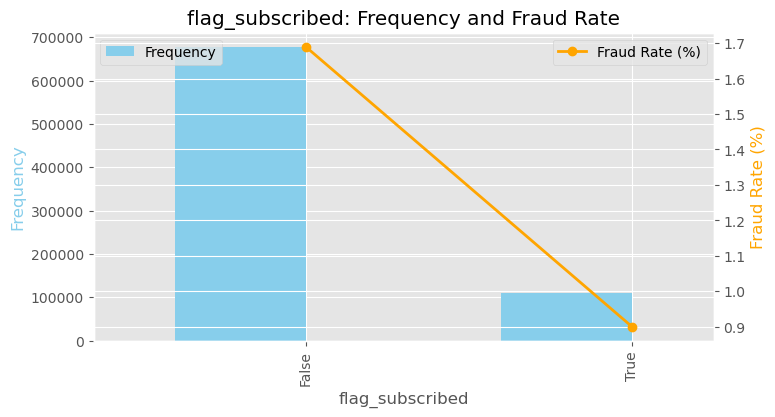

In [ ]:
func.plot_freq_target_rate(df, ['flag_subscribed'])

## 8. Save a Pickle

In [ ]:
# define pickle path
today = (date.today()).strftime("%Y%m%d")
pkl_path = os.path.join('/pkl_objects/', today)
print(pkl_path)

/pkl_objects/20240708


In [ ]:
os.makedirs(pkl_path, exist_ok=True)

In [ ]:
categorical_features = [
    # 'merchantName', # checked separately
    'acqCountry',
    'merchantCountryCode',
    'posEntryMode',
    'posConditionCode',
    # 'merchantCategoryCode',  # checked separately
    'transactionType', # checked separately
    'cardPresent',
    'expirationDateKeyInMatch',
    # 'isFraud', # unnecessary
    # 'merchantState', # no data
    'CVV_Match' # not yet produced
]

In [ ]:
pkl_file = pkl_path + '/final_data.pkl'
pickle.dump([df, categorical_features, continuous_features], open(pkl_file, "wb"))

## 9. Further Pattern Analysis

Monthly Transaction Stats:
   year_month  transaction_count  fraud_count  fraud_rate
0  2016-01-01              61572         1070    1.737803
1  2016-02-01              59042         1020    1.727584
2  2016-03-01              63927         1060    1.658141
3  2016-04-01              62633         1003    1.601392
4  2016-05-01              65689         1081    1.645633
5  2016-06-01              64735         1036    1.600371
6  2016-07-01              67159         1057    1.573877
7  2016-08-01              68128         1028    1.508924
8  2016-09-01              66777         1016    1.521482
9  2016-10-01              69627         1056    1.516653
10 2016-11-01              68097          959    1.408285
11 2016-12-01              68976         1031    1.494723


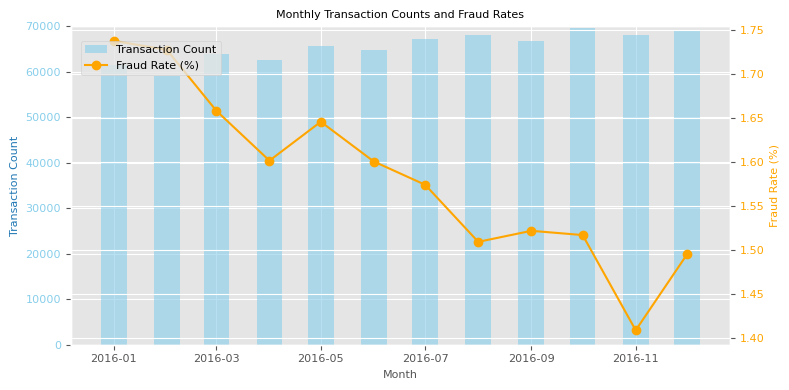

In [ ]:
func.plot_monthly_transaction_stats(df, 'transactionDateTime')

### Key Takeaways
- The chart shows monthly transaction counts and fraud rates from January through December 2016. Transaction counts fluctuate around 65,000 monthly transactions, with a slight increase towards the end of the year. 
- Fraud rates start at around 1.75% in January and gradually decrease to about 1.40% by November, indicating a downward trend in fraud rates over the period despite minor fluctuations. 
- This suggests an improvement in fraud prevention or detection measures throughout the year.